In [1]:
import numpy as np
from skimage import io as io_url
import matplotlib.pyplot as plt
import cv2

In [2]:
def DFT_slow(data):
  """
  Implement the discrete Fourier Transform for a 1D signal
  params:
    data: Nx1: (N, ): 1D numpy array
  returns:
    DFT: Nx1: 1D numpy array 
  """
  N = len(data)
  matrix_e = np.zeros((N,N), dtype=complex)
  for k in range(N):
    for n in range(N):
      matrix_e[k,n] = np.exp(-2j * np.pi * k * n / N)
  X = np.dot(matrix_e, data)
  print(X)
  return X

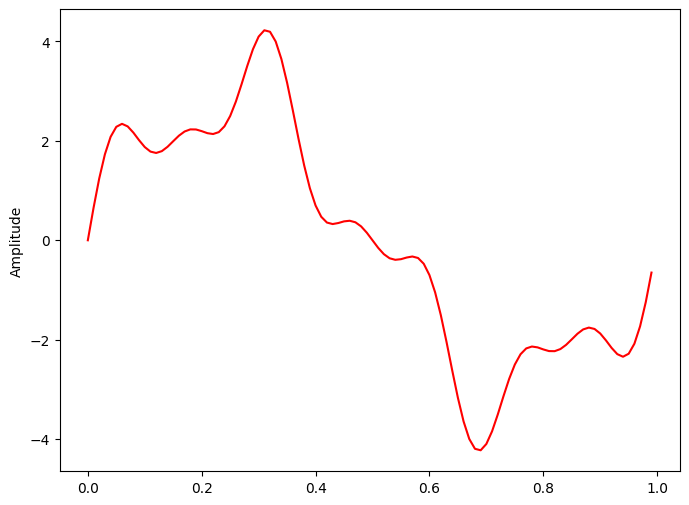

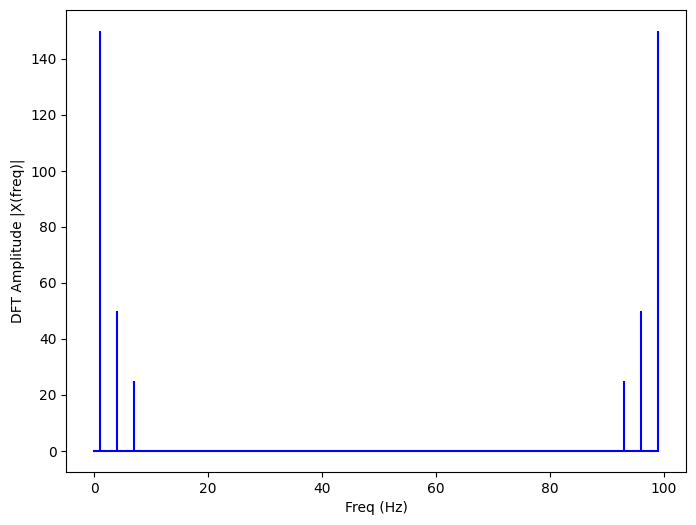

In [3]:
# sampling rate
sr = 100
# sampling interval
ts = 1.0/sr
t = np.arange(0,1,ts)

freq = 1.
x = 3*np.sin(2*np.pi*freq*t)

freq = 4
x += np.sin(2*np.pi*freq*t)

freq = 7   
x += 0.5* np.sin(2*np.pi*freq*t)

plt.figure(figsize = (8, 6))
plt.plot(t, x, 'r')
plt.ylabel('Amplitude')

plt.show()

X = DFT_slow(x)

# calculate the frequency
N = len(X)
n = np.arange(N)
T = N/sr
freq = n/T 

plt.figure(figsize = (8, 6))
plt.stem(freq, abs(X), 'b', \
         markerfmt=" ", basefmt="-b")
plt.xlabel('Freq (Hz)')
plt.ylabel('DFT Amplitude |X(freq)|')
plt.show()

plt.show()

In [4]:
def display_image(image, title="Image"):
    """
    Display an image using matplotlib. Rembember to use plt.show() to display the image
    """
    plt.imshow(image)
    plt.title(title)

In [5]:
def show_img(origin, row_fft, row_col_fft):
    """
    Show the original image, row-wise FFT and column-wise FFT

    params:
        origin: (H, W): 2D numpy array
        row_fft: (H, W): 2D numpy array
        row_col_fft: (H, W): 2D numpy array    
    """
    fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(12, 8))
    axs[0].imshow(origin, cmap='gray')
    axs[0].set_title('Original Image')
    axs[0].axis('off')
    axs[1].imshow(np.log(np.abs(np.fft.fftshift(row_fft))), cmap='gray')
    axs[1].set_title('Row-wise FFT')
    axs[1].axis('off')
    axs[2].imshow((np.log(np.abs(np.fft.fftshift(row_col_fft)))), cmap='gray')
    axs[2].set_title('Column-wise FFT')
    axs[2].axis('off')
    plt.show()

In [14]:
def DFT_2D(gray_img):
    """
    Implement the 2D Discrete Fourier Transform
    Note that: dtype of the output should be complex_
    params:
        gray_img: (H, W): 2D numpy array
        
    returns:
        row_fft: (H, W): 2D numpy array that contains the row-wise FFT of the input image
        row_col_fft: (H, W): 2D numpy array that contains the column-wise FFT of the input image
    """
    row_fft = np.fft.fft(gray_img, axis=1)
    row_col_fft = np.fft.fft(row_fft, axis=0)
    
    return row_fft, row_col_fft
    

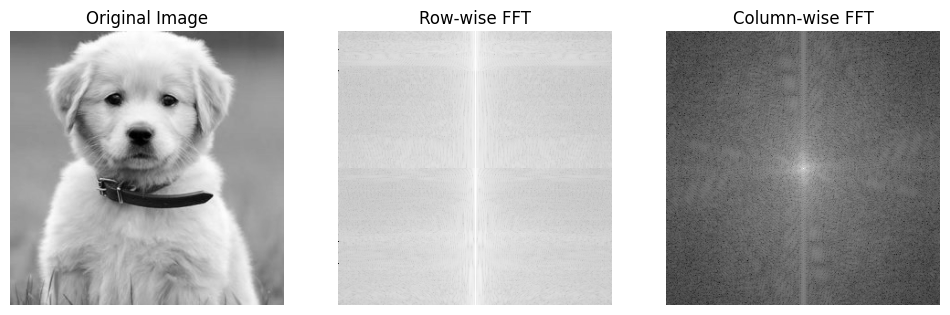

In [15]:
img = io_url.imread('https://img2.zergnet.com/2309662_300.jpg')
gray_img = np.mean(img, -1)
# tmp = np.fft.fft2(gray_img)
row_fft, row_col_fft = DFT_2D(gray_img)
show_img(gray_img, row_fft, row_col_fft)
# display_image(tmp)